### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<Axes: >

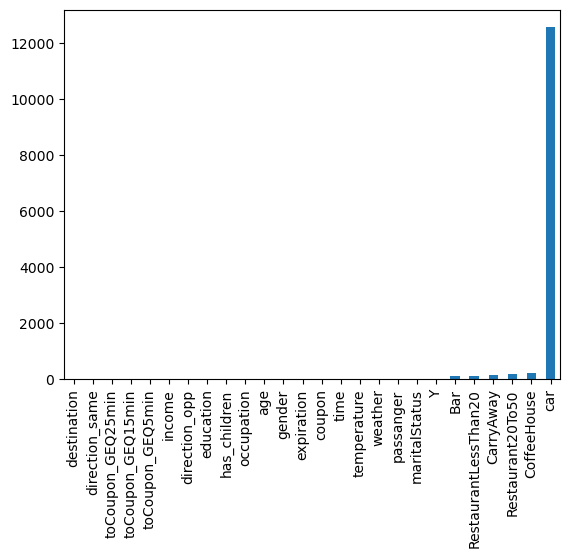

In [ ]:
# Check the dataframe variables, types, and number of rows
data.info()

# Create a barchart that displays the number of missing data values for each variable 
data.isnull().sum().sort_values().plot(kind = 'bar')

3. Decide what to do about your missing data -- drop, replace, other...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

<Axes: >

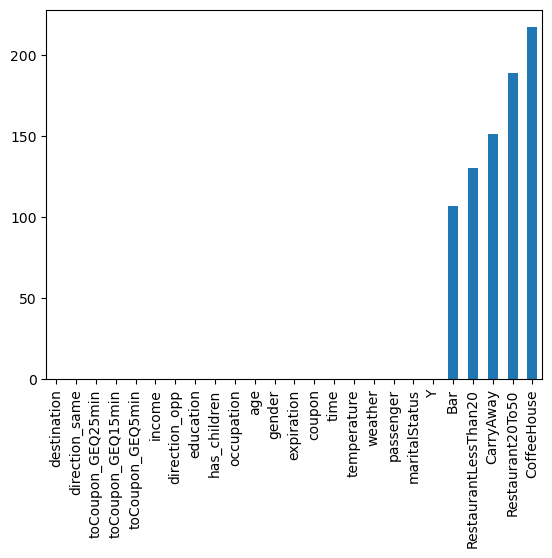

In [102]:
# Eliminate car columb since it is only available in a very small number of situations. Therefore, will not factor into prediction model 
data_dropped = data.drop(columns=['car'])

# Show dataset after data is cleaned 
#data_dropped.info()
#data_dropped.isnull().sum().sort_values().plot(kind = 'bar')

# Correct misspelling of passenger 
data_spelling = data_dropped.rename(columns={"passanger" : "passenger"})

# Made decision to keep include other columns with missing data since there are all insignificant in %. Call this cleaned data
data_cleaned = data_spelling

# Show dataset after data is cleaned 
data_cleaned.info()
data_cleaned.isnull().sum().sort_values().plot(kind = 'bar')

4. What proportion of the total observations chose to accept the coupon?



In [15]:
# Count number of times customer accepted coupon
a = data_cleaned['Y'].sum()

# Count total number of rows 
b = len(data_cleaned)
print(a, b)

# proportion of total accepted coupons
a/b

7210 12684


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Coupon Count by Type'}, xlabel='coupon'>

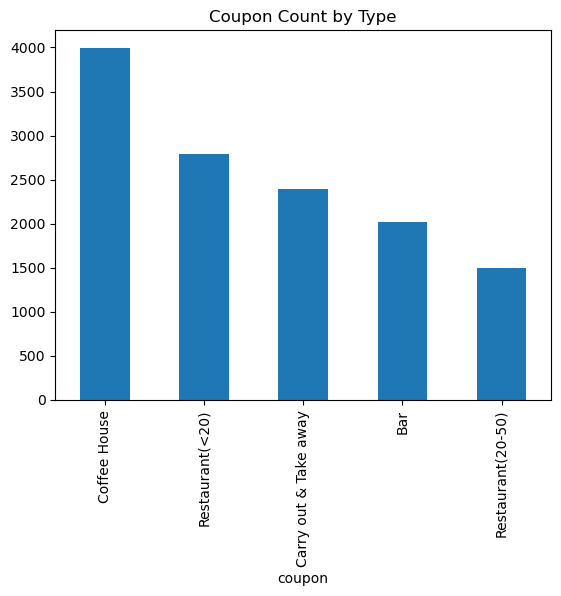

In [18]:
data_cleaned.coupon.value_counts().plot(kind = 'bar', title ="Coupon Count by Type")

6. Use a histogram to visualize the temperature column.

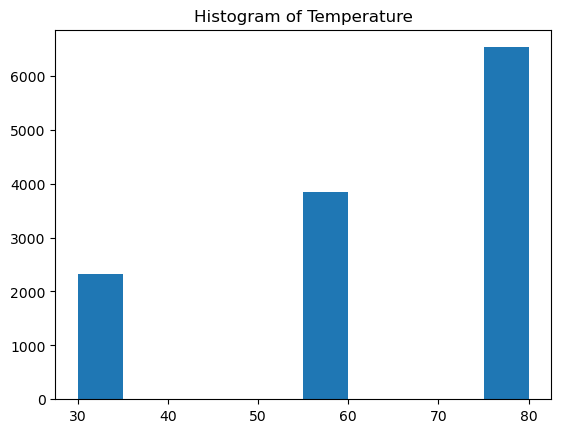

In [ ]:
# sns.displot(data_cleaned['temperature'])
plt.hist(data_cleaned['temperature'])
plt.title('Histogram of Temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
data_coupons = data_cleaned['coupon']
data_coupons.head()

0          Restaurant(<20)
1             Coffee House
2    Carry out & Take away
3             Coffee House
4             Coffee House
Name: coupon, dtype: object

2. What proportion of bar coupons were accepted?


In [67]:
# Calculate the number of bar coupons accepted as a proportion of bar coupons given
bar_count = ((data_cleaned['coupon'] == 'Bar')).sum()
bar_count_accepted = ((data_cleaned['coupon'] == 'Bar') & (data_cleaned['Y'])).sum()
bar_acceptance_ratio = bar_count_accepted / bar_count
print("Total number of Bar coupons given out = ", bar_count)
print("Total number of Bar coupons accepted = ", bar_count_accepted)
print("Bar coupon acceptance rate = ", round(bar_acceptance_ratio, 2))

Total number of Bar coupons given out =  2017
Total number of Bar coupons accepted =  827
Bar coupon acceptance rate =  0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


666
1797
Ratio of acceptance for customers that visit bars <= 3 times per month =  0.371
153
199
Ratio of acceptance for customers who visit bars > 3 times per month =  0.769


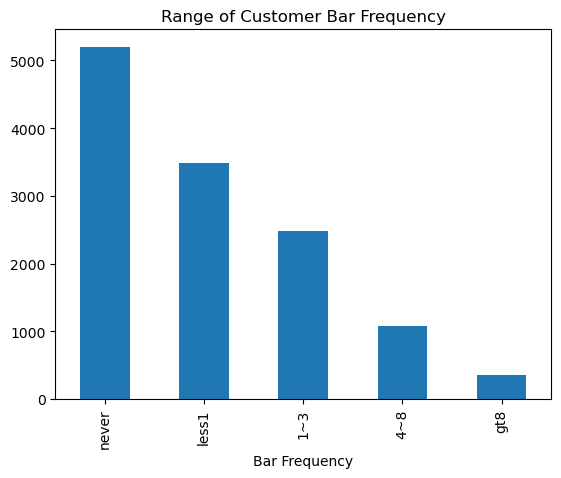

In [89]:
# First check the range of Bar values 
data_cleaned.Bar.value_counts().plot(kind = 'bar', xlabel='Bar Frequency', title ="Range of Customer Bar Frequency")

# Calculate total count when customers accepted a bar coupon and they frequented bars 3 or fewer times a month
bar_count_accepted_3orless = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['Bar'] == 'never') | (data_cleaned['Bar'] == 'less1') | (data_cleaned['Bar'] == '1~3')) & (data_cleaned['Y'])).sum()
bar_count_given_3orless = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['Bar'] == 'never') | (data_cleaned['Bar'] == 'less1') | (data_cleaned['Bar'] == '1~3'))).sum()
print(bar_count_accepted_3orless)
print(bar_count_given_3orless)
print("Ratio of acceptance for customers that visit bars <= 3 times per month = ", round(bar_count_accepted_3orless / bar_count_given_3orless, 3))

# Calculate total count when customers accepted a bar coupon and they frequented bars greater than 3 times a month
bar_count_accepted_greaterthan3 = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['Bar'] == '4~8') | (data_cleaned['Bar'] == 'gt8')) & (data_cleaned['Y'])).sum()
bar_count_given_greaterthan3 = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['Bar'] == '4~8') | (data_cleaned['Bar'] == 'gt8'))).sum()
print(bar_count_accepted_greaterthan3)
print(bar_count_given_greaterthan3)
print("Ratio of acceptance for customers who visit bars > 3 times per month = ", round(bar_count_accepted_greaterthan3 / bar_count_given_greaterthan3, 3))


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


105
136
Rate of acceptance for customers who visit bars > 3 times per month and are greater than 25 years of age =  0.772
There is not much of a difference between those who are > 25 and those that are >= 25 years. Age does not seem to be a factor.


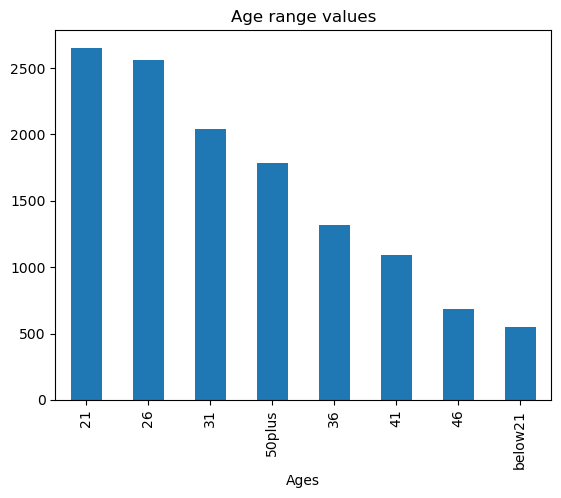

In [91]:
# According to instructor clarification check acceptance rate of customers that go to bar > 3 times a month and are > 25 years old

# First check the age distribution values
data_cleaned.age.value_counts().plot(kind = 'bar', xlabel='Ages', title ="Age range values")

# Calculate the acceptance rate of customers who go to the bar > 3 / month and > 25 years old
bar_count_accepted_greaterthan3visits_greaterthan25years = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['Bar'] == '4~8') | (data_cleaned['Bar'] == 'gt8')) & ((data_cleaned['age'] == '26') | (data_cleaned['age'] == '31') | (data_cleaned['age'] == '50plus') | (data_cleaned['age'] == '36') | (data_cleaned['age'] == '41') | (data_cleaned['age'] == '46')) & (data_cleaned['Y'])).sum()
print(bar_count_accepted_greaterthan3visits_greaterthan25years) 
bar_count_given_greaterthan3visits_greaterthan25years = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['Bar'] == '4~8') | (data_cleaned['Bar'] == 'gt8')) & ((data_cleaned['age'] == '26') | (data_cleaned['age'] == '31') | (data_cleaned['age'] == '50plus') | (data_cleaned['age'] == '36') | (data_cleaned['age'] == '41') | (data_cleaned['age'] == '46'))).sum()
print(bar_count_given_greaterthan3visits_greaterthan25years)
print("Rate of acceptance for customers who visit bars > 3 times per month and are greater than 25 years of age = ", round(bar_count_accepted_greaterthan3visits_greaterthan25years / bar_count_given_greaterthan3visits_greaterthan25years, 3))
print("There is not much of a difference between those who are > 25 and those that are >= 25 years. Age does not seem to be a factor.")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


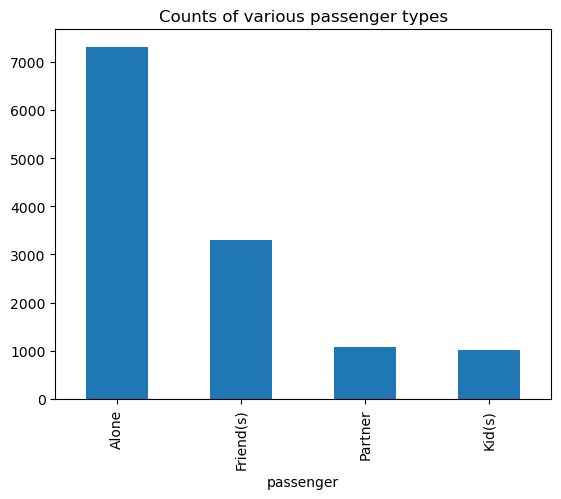

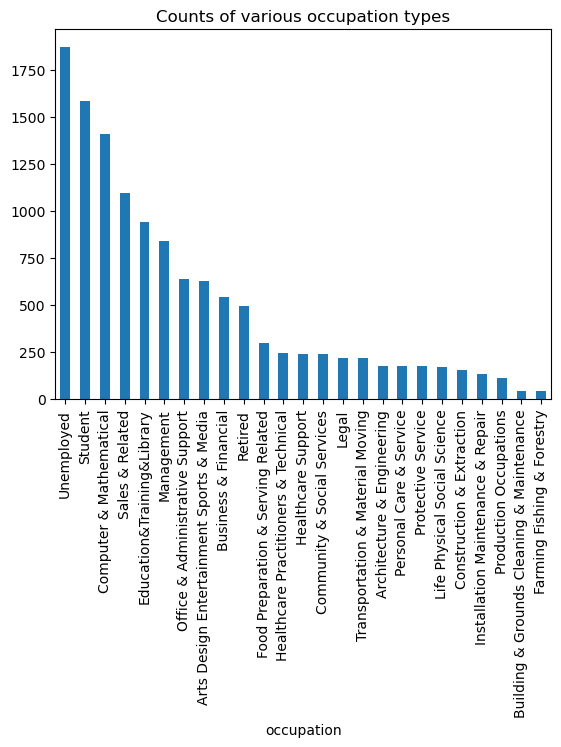

781
1805
Rate of acceptance for customers who visit bars > 3 times per month had passengers that were not Kid(s), and occupations that were not Farming Fishing & Forestry =  0.433
There is a significant decrease in the acceptance of bar coupons from customers that did not travel with kids or work in Farming, Fishing, & Forestry


In [116]:
# According to instructor clarification check acceptance rate of customers that go to bar > 3 times a month, not traveling with kids, and occupations other than farming, fishing, or forestry

# Lets check the various passenger types
data_cleaned.passenger.value_counts().plot(kind = 'bar', title ="Counts of various passenger types")
plt.show()

# Lets check the various occupations
data_cleaned.occupation.value_counts().plot(kind = 'bar', title ="Counts of various occupation types")
plt.show()

# Calculate the acceptance rate of customers who go to the bar > 3 / month, had passengers that were not 'Kid(s)', and occupations that were not 'Farming Fishing & Forestry'
bar_count_accepted_notkids_notfarming = ((data_cleaned['coupon'] == 'Bar') & (data_cleaned['passenger'] != 'Kid(s)') & (data_cleaned['occupation'] != 'Farming Fishing & Forestry') & (data_cleaned['Y'])).sum()
print(bar_count_accepted_notkids_notfarming)
bar_count_given_notkids_notfarming = ((data_cleaned['coupon'] == 'Bar') & (data_cleaned['passenger'] != 'Kid(s)') & (data_cleaned['occupation'] != 'Farming Fishing & Forestry')).sum()
print(bar_count_given_notkids_notfarming)
print("Rate of acceptance for customers who visit bars > 3 times per month had passengers that were not Kid(s), and occupations that were not Farming Fishing & Forestry = ", round(bar_count_accepted_notkids_notfarming / bar_count_given_notkids_notfarming, 3))
print("There is a significant decrease in the acceptance of bar coupons from customers that did not travel with kids or work in Farming, Fishing, & Forestry")





6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



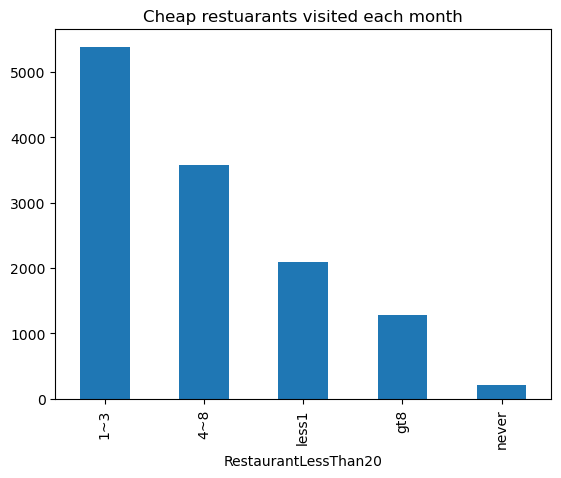

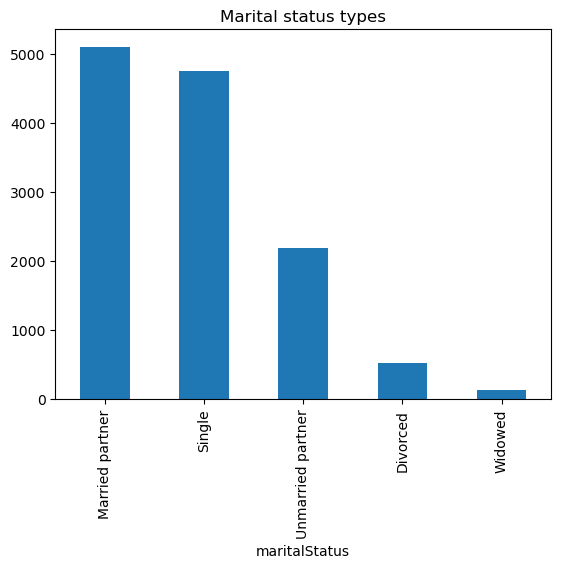

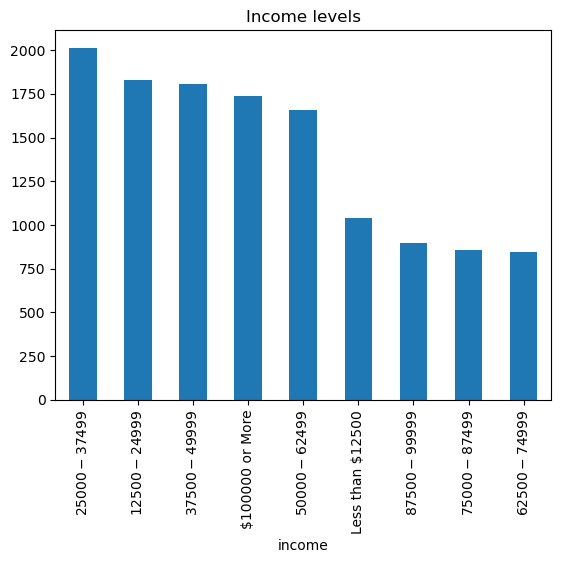

777
1790
Rate of acceptance for customers who visit bars > 3 times per month, had passengers that were not Kids, and were not widowed =  0.434

440
899
Rate of acceptance for customers who visit bars > 3 times per month, and are under 30 =  0.489

156
344
Rate of acceptance for customers who go to cheap restaurants > 4 times per month and have income less than $50k =  0.453

The rate of coupon acceptance for customers for each of these cases is about the same ~ 45%. Which is slightly lower than the overall acceptance rate of 56%.


In [135]:
# According to instructor clarification check acceptance rate of customers that go to bar > 3 times a month

# Lets check the cheap restaurant data types
data_cleaned.RestaurantLessThan20.value_counts().plot(kind = 'bar', title ="Cheap restuarants visited each month")
plt.show()

# Lets check the martial status types
data_cleaned.maritalStatus.value_counts().plot(kind = 'bar', title ="Marital status types")
plt.show()

# Lets check the income levels
data_cleaned.income.value_counts().plot(kind = 'bar', title ="Income levels")
plt.show()

# Calculate the acceptance rate of drivers who go to bars > 3 times a month, had passengers that were not Kids, and were not widowed
bar_count_accepted_notkids_notwidowed = ((data_cleaned['coupon'] == 'Bar') & (data_cleaned['passenger'] != 'Kid(s)') & (data_cleaned['maritalStatus'] != 'Widowed') & (data_cleaned['Y'])).sum()
print(bar_count_accepted_notkids_notwidowed)
bar_count_given_notkids_notwidowed = ((data_cleaned['coupon'] == 'Bar') & (data_cleaned['passenger'] != 'Kid(s)') & (data_cleaned['maritalStatus'] != 'Widowed')).sum()
print(bar_count_given_notkids_notwidowed)
print("Rate of acceptance for customers who visit bars > 3 times per month, had passengers that were not Kids, and were not widowed = ", round(bar_count_accepted_notkids_notwidowed / bar_count_given_notkids_notwidowed, 3))
print()

# Calculate the acceptance rate of drivers who go to bars > 3 times a month and under the age of 30
bar_count_accepted_greaterthan3_under30 = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['age'] == '21') | (data_cleaned['age'] == '26') | (data_cleaned['age'] == 'below21')) & (data_cleaned['Y'])).sum()
print(bar_count_accepted_greaterthan3_under30)
bar_count_given_greaterthan3_under30 = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['age'] == '21') | (data_cleaned['age'] == '26') | (data_cleaned['age'] == 'below21'))).sum()
print(bar_count_given_greaterthan3_under30)
print("Rate of acceptance for customers who visit bars > 3 times per month, and are under 30 = ", round(bar_count_accepted_greaterthan3_under30 / bar_count_given_greaterthan3_under30, 3))
print()

# Calculate the acceptance rate of drivers who go to cheap restaurants > 4 times per month and have income less than $50k
bar_count_accepted_cheaprestuarants_lessthan50k = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['RestaurantLessThan20'] == '4~8') | (data_cleaned['RestaurantLessThan20'] == 'gt8')) & ((data_cleaned['income'] == 'Less than $12500') | (data_cleaned['income'] == '$12500 - $24999') | (data_cleaned['income'] == '$25000 - $37499') | (data_cleaned['income'] == '$37500 - $49999')) & (data_cleaned['Y'])).sum()
print(bar_count_accepted_cheaprestuarants_lessthan50k)
bar_count_given_cheaprestuarants_lessthan50k = ((data_cleaned['coupon'] == 'Bar') & ((data_cleaned['RestaurantLessThan20'] == '4~8') | (data_cleaned['RestaurantLessThan20'] == 'gt8')) & ((data_cleaned['income'] == 'Less than $12500') | (data_cleaned['income'] == '$12500 - $24999') | (data_cleaned['income'] == '$25000 - $37499') | (data_cleaned['income'] == '$37500 - $49999'))).sum()
print(bar_count_given_cheaprestuarants_lessthan50k)
print("Rate of acceptance for customers who go to cheap restaurants > 4 times per month and have income less than $50k = ", round(bar_count_accepted_cheaprestuarants_lessthan50k / bar_count_given_cheaprestuarants_lessthan50k, 3))
print()

# Conclusion
print("The rate of coupon acceptance for customers for each of these cases is about the same ~ 45%. Which is slightly lower than the overall acceptance rate of 57%.")


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [136]:
print("There is a high correlation between customers that accept bar coupons and frequently go to bars. That is the dominating factor independent of age, occupation, or income.")

There is a high correlation between customers that accept bar coupons and frequently go to bars. That is the dominating factor independent of age, occupation, or income.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


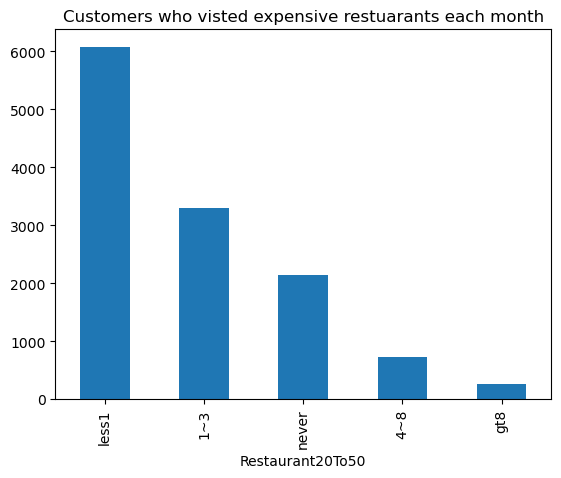

Total number of expensive restuarant coupons given out =  1492
Total number of expensive restuarant coupons accepted =  658
Expensive restuarant coupon acceptance rate =  0.441

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 14 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1492 non-null   object
 1   passenger             1492 non-null   object
 2   weather               1492 non-null   object
 3   temperature           1492 non-null   int64 
 4   time                  1492 non-null   object
 5   coupon                1492 non-null   object
 6   expiration            1492 non-null   object
 7   gender                1492 non-null   object
 8   age                   1492 non-null   object
 9   maritalStatus         1492 non-null   object
 10  has_children          1492 non-null   int64 
 11  education             1492 non-null   object
 12  occupation   

<Axes: title={'center': '% customers that used expensive restuarant couplons'}, ylabel='count'>

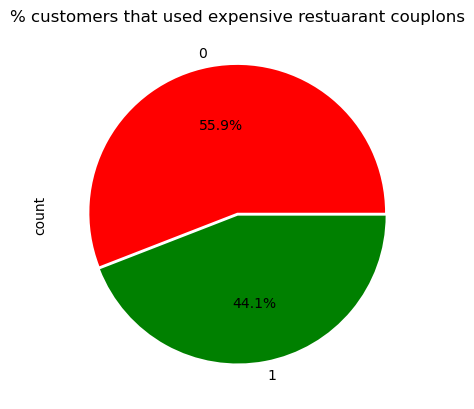

In [191]:
# Will examine the characteristics of customers who accepted the coupons to more expensive restuarants ($20-$50)

# Let's look at all the columns
print(data_cleaned.columns)

# Lets check the expensive restaurant data types
data_cleaned.Restaurant20To50.value_counts().plot(kind = 'bar', title ="Customers who visted expensive restuarants each month")
plt.show()

# Calculate the number of more expensive restaurant coupons accepted as a proportion of more expensive restuarant coupons given
exprestuarant_count = ((data_cleaned['coupon'] == 'Restaurant(20-50)')).sum()
exprestuarant_count_accepted = ((data_cleaned['coupon'] == 'Restaurant(20-50)') & (data_cleaned['Y'])).sum()
exprestuarant_acceptance_ratio = exprestuarant_count_accepted / exprestuarant_count
print("Total number of expensive restuarant coupons given out = ", exprestuarant_count)
print("Total number of expensive restuarant coupons accepted = ", exprestuarant_count_accepted)
print("Expensive restuarant coupon acceptance rate = ", round(exprestuarant_acceptance_ratio, 3))
print()

# Let's first create a new df that contains only the customers who received an expensive restuarant coupon
data_expfoodcoupon = data_cleaned[data_cleaned['coupon'] == 'Restaurant(20-50)']
data_expfoodcoupon.info()
data_expfoodcoupon.head()

# Let's show the % of customers who used expensive restuarant coupons
data_expfoodcoupon.Y.value_counts().plot(kind='pie', explode = [0.01,0.01], autopct='%1.1f%%', colors = ['r', 'g'], title='% customers that used expensive restuarant couplons')

#pd.crosstab((data_cleaned['coupon'] == 'Restaurant(20-50)') & (data_cleaned['Y']), data_cleaned.income).plot(kind='bar')


# Let's examine the overall coupon acceptance rate of those who visited expensive resturants >= 4 times per month
# Let's examine the types of coupons accepted by those who frequently visted expense restuarants (>=4 times per month)
#pd.crosstab(data_cleaned.Y, data_cleaned.Restaurant20To50).plot(kind='bar')

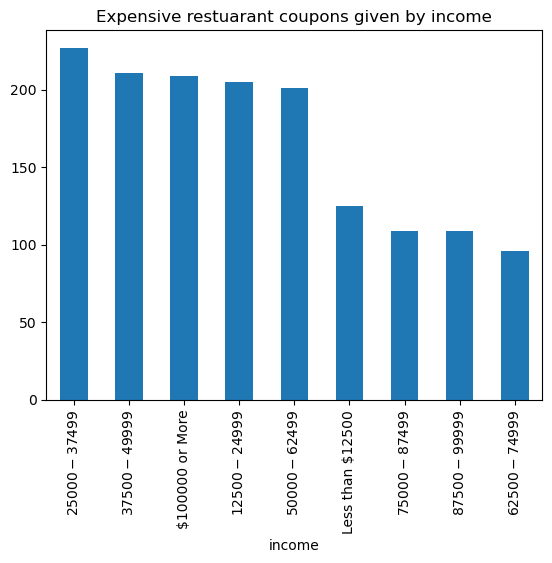

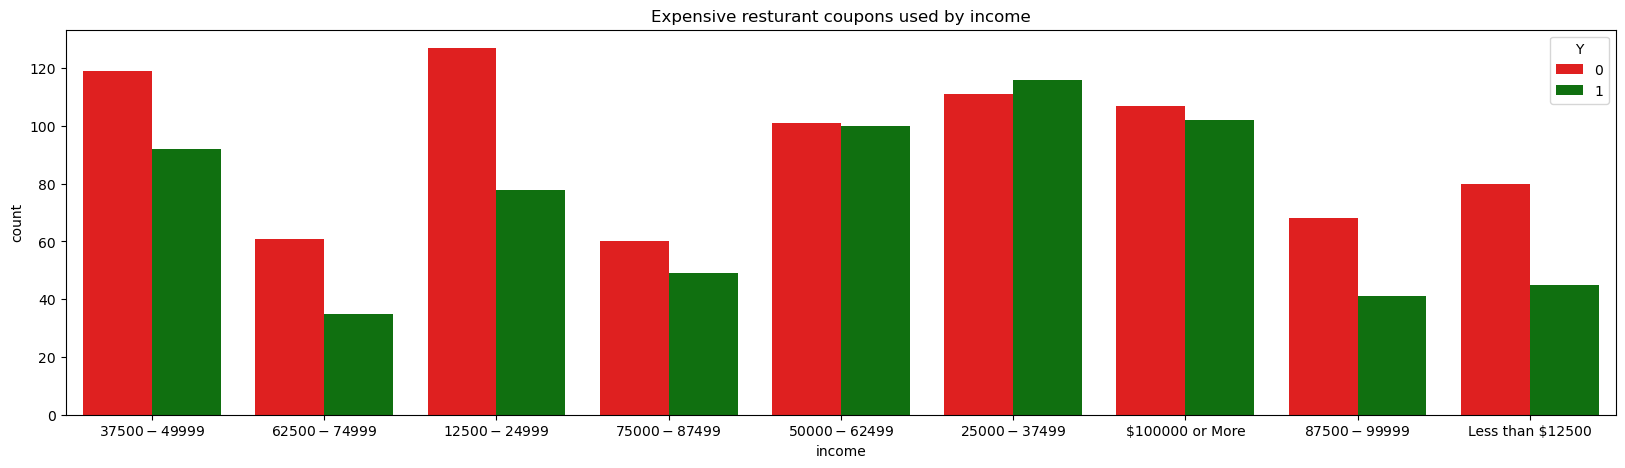

Conclusion:
There is not a significant correlation between customer income and acceptance of expensive restuarant coupons


In [233]:
# Let's examine relationship with income

data_expfoodcoupon.income.value_counts().plot(kind='bar', title='Expensive restuarant coupons given by income')
plt.show()

plt.figure(figsize = (20,5))
sns.countplot(data = data_expfoodcoupon, x = 'income', hue = 'Y', palette=['r', 'g'])
plt.title('Expensive resturant coupons used by income')
plt.show()

# Conclusions
print('Conclusion:')
print('There is not a significant correlation between customer income and acceptance of expensive restuarant coupons')

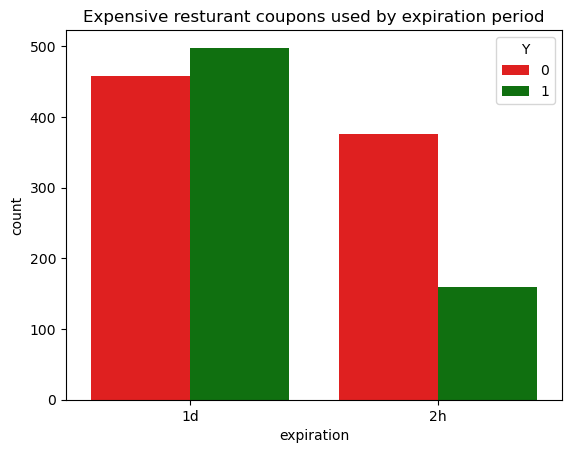

Conclusion:
There is a significant increase of expensive restuarant acceptance rates give a longer expiration period


In [241]:
# Let's examine relationship with coupon expiration date

sns.countplot(data = data_expfoodcoupon, x = 'expiration', hue = 'Y', palette=['r', 'g'])
plt.title('Expensive resturant coupons used by expiration period')
plt.show()

# Conclusions
print('Conclusion:')
print('There is a significant increase of expensive restuarant acceptance rates give a longer expiration period')

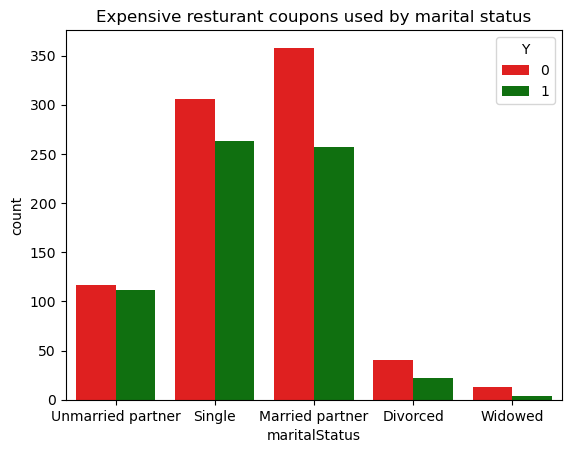

Conclusion:
There is a significant increase of expensive restuarant acceptance rates for those customers that are single or unmarried with a partner


In [244]:
# Let's examine relationship with customer marital status

sns.countplot(data = data_expfoodcoupon, x = 'maritalStatus', hue = 'Y', palette=['r', 'g'])
plt.title('Expensive resturant coupons used by marital status')
plt.show()

# Conclusions
print('Conclusion:')
print('There is a significant increase of expensive restuarant acceptance rates for those customers that are single or unmarried with a partner')

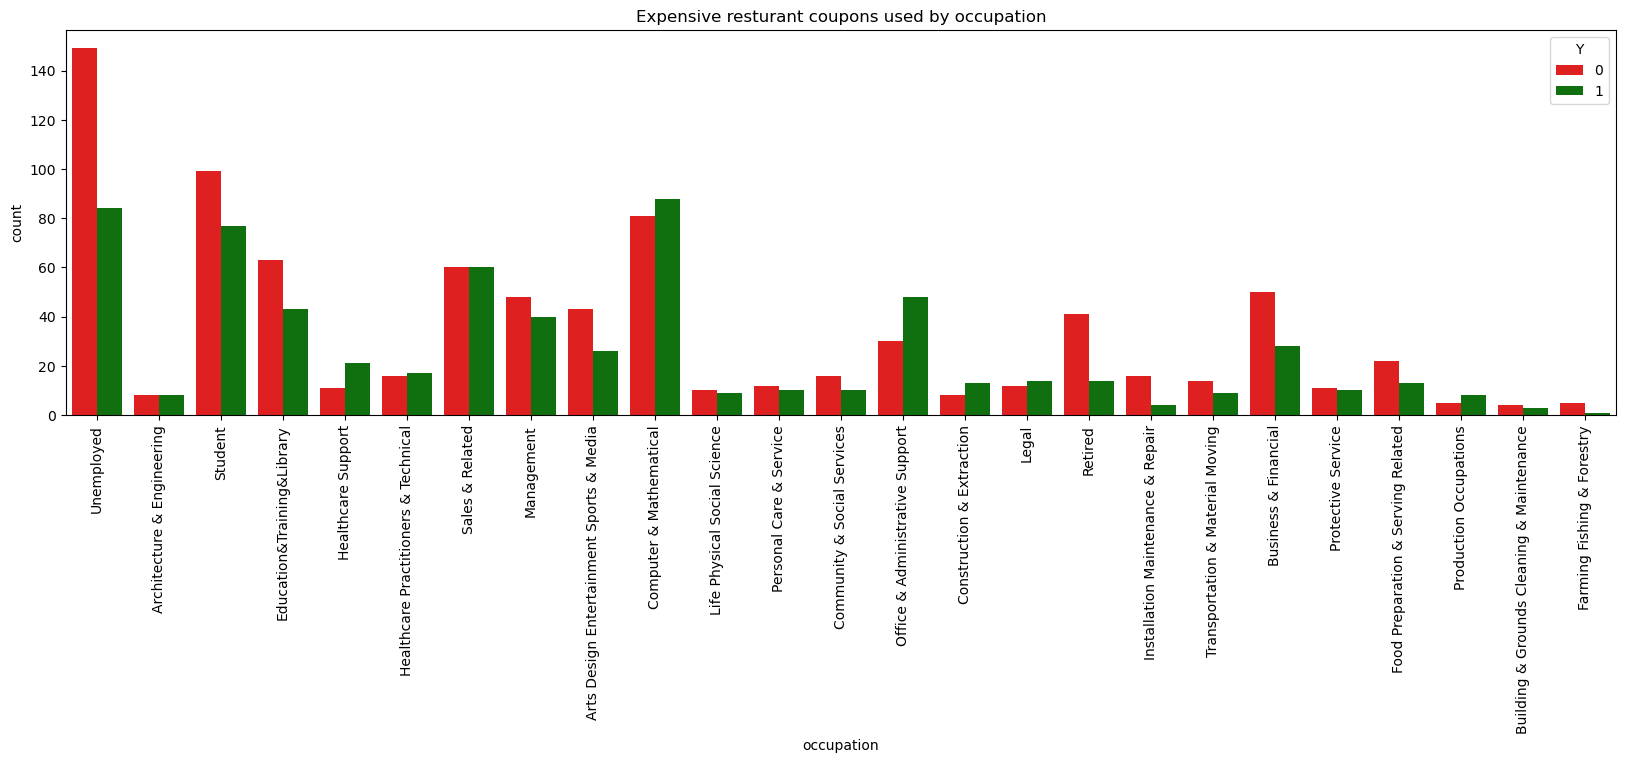

Conclusion:
The occupations with largest usage rate of expensive restuarant coupons:architecture & engineering, sales, computer & math, office admin support


In [252]:
# Let's examine relationship with customer occupation

plt.figure(figsize = (20,5))
sns.countplot(data = data_expfoodcoupon, x = 'occupation', hue = 'Y', palette=['r', 'g'])
plt.xticks(rotation=90)
plt.title('Expensive resturant coupons used by occupation')
plt.show()

# Conclusions
print('Conclusion:')
print('The occupations with largest usage rate of expensive restuarant coupons:architecture & engineering, sales, computer & math, office admin support')